In [1]:
#import the necessary packages
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/spam.csv', encoding='ansi')
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


## 1. Data Cleaning

In [3]:
#remove the unnamed column
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
#rename the columns
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
df.head(2)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [5]:
df['label'] = (df['label'] == 'spam').astype(int)
df.sample(5)

,label,text
4114,0,Sorry. You never hear unless you book it. One ...
3710,0,"Sorry pa, i dont knw who ru pa?"
2041,0,ÌÏ dun wan to watch infernal affair?
1820,0,I'll probably be by tomorrow (or even later to...
1275,0,Wot u up 2 u weirdo?


In [6]:
#count duplicates
df.duplicated().sum()

403

In [7]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 2. EDA

In [8]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.value_counts('label')

label
0    4516
1     653
Name: count, dtype: int64

In [11]:
#plot the distribution of the labels using pie chart
import matplotlib.pyplot as plt

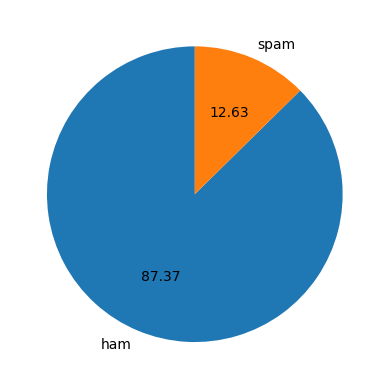

In [15]:
plt.pie(df.value_counts('label'), labels=['ham', 'spam'], autopct='%0.2f', startangle=90)
plt.show()

In [24]:
#install nltk and punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
df['num_characters'] = df['text'].apply(len)
df.head()

,label,text,num+_characters,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61


In [27]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
import seaborn as sns

In [30]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

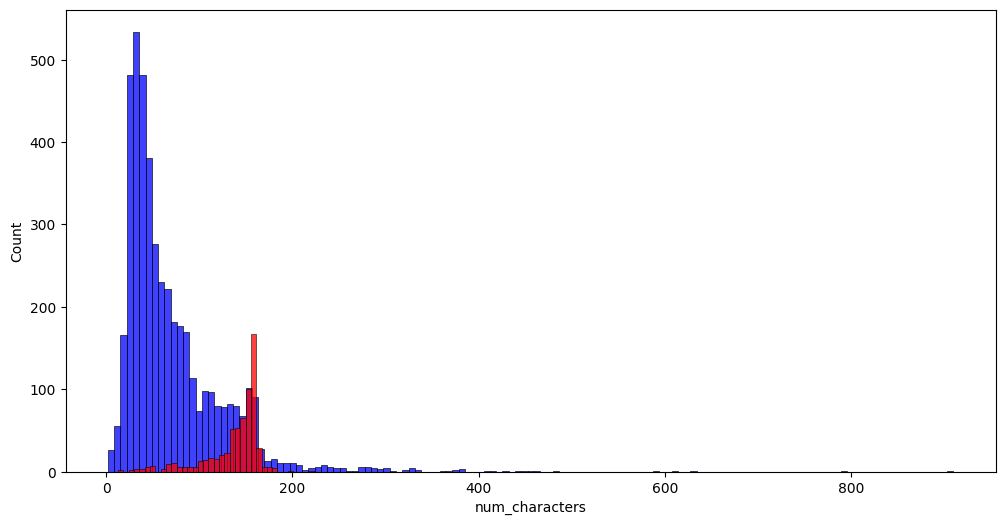

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='Spam')

<Axes: xlabel='num_words', ylabel='Count'>

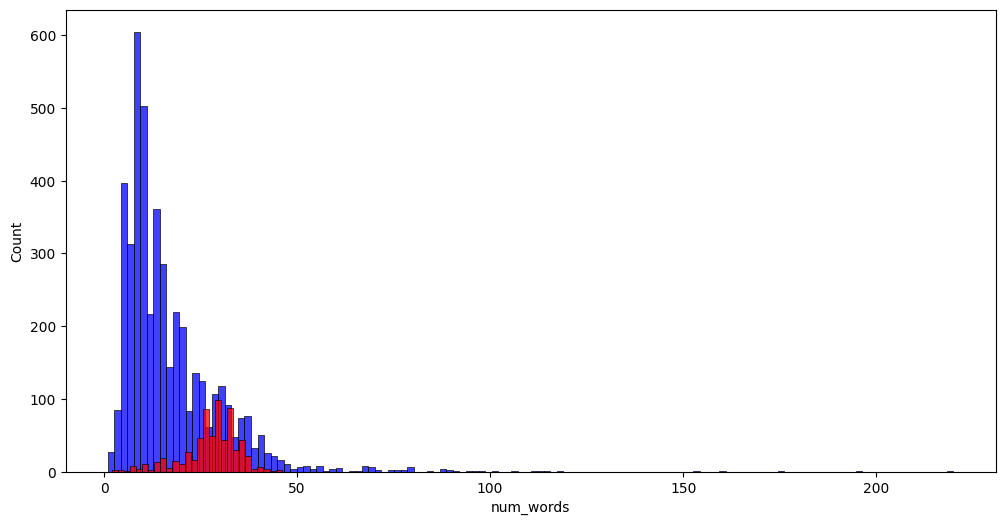

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Spam')

<Axes: xlabel='num_sentences', ylabel='Count'>

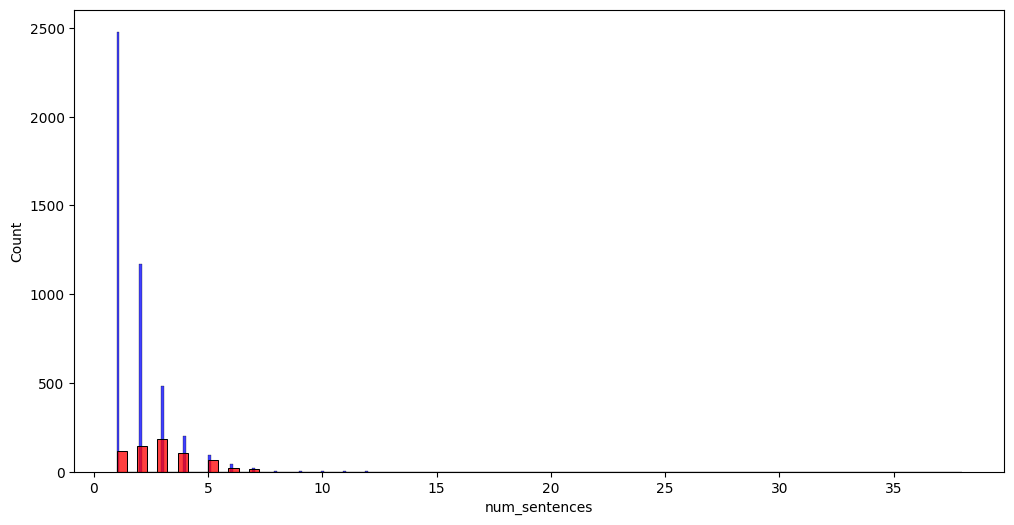

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_sentences'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_sentences'], color='red', label='Spam')

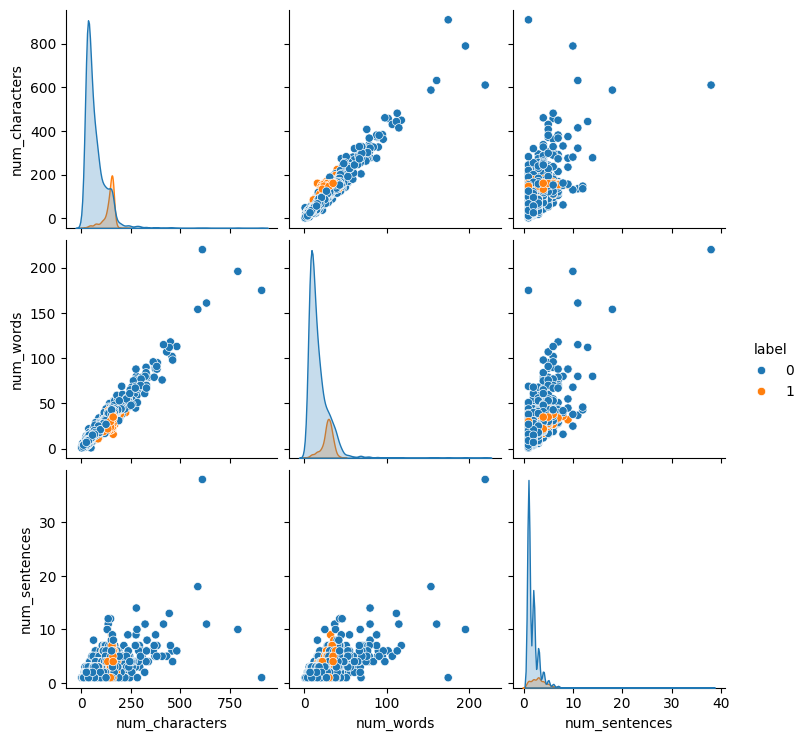

In [37]:
sns.pairplot(df, hue='label', vars=['num_characters', 'num_words', 'num_sentences'])

In [43]:
df[['label', 'num_characters', 'num_words', 'num_sentences']].corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

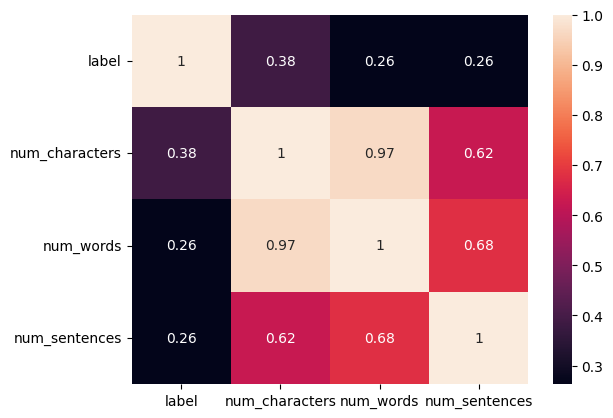

In [44]:
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

## 3. Data Preprocessing

- Lowercase
- Tokenization
- Remove Stopwords
- Remove Punctuation and Special Characters
- Stemming

In [57]:
text = "This is Sample ## Text message to be pro'cessed. Please process it! ."

In [50]:
text = text.lower()
text

"this is sample ## text message to be pro'cessed. please process it! ."

In [51]:
text = nltk.word_tokenize(text)
text

['this',
 'is',
 'sample',
 '#',
 '#',
 'text',
 'message',
 'to',
 'be',
 "pro'cessed",
 '.',
 'please',
 'process',
 'it',
 '!',
 '.']

In [53]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
from string import punctuation

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('processing')

'process'

In [56]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    L = []

    for word in text:
        if word in stopwords.words('english') or word in punctuation:
            continue
        if word.isalnum():
            L.append(ps.stem(word))

    return ' '.join(L)

In [58]:
transform(text)

'sampl text messag pleas process'

In [59]:
df['text'].apply(transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [60]:
df['transformed_text'] = df['text'].apply(transform)

In [68]:
from wordcloud import WordCloud
wc = WordCloud(width=700, height=500, background_color='white', min_font_size=12)

In [69]:
spam_wc = wc.generate(' '.join(df[df['label'] == 1]['transformed_text']))

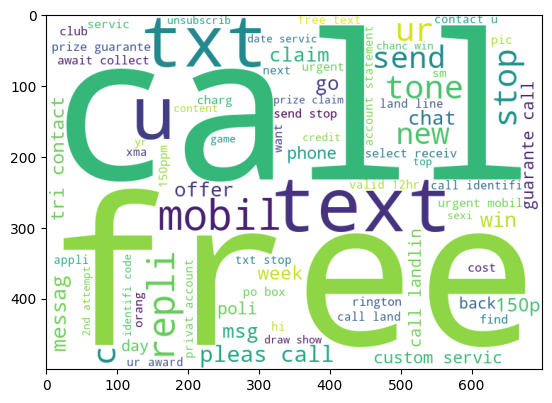

In [70]:
plt.imshow(spam_wc)

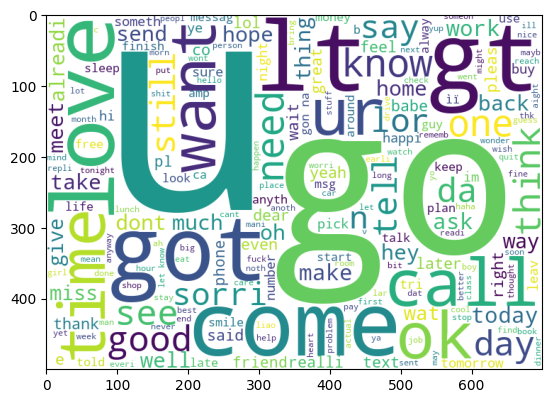

In [71]:
ham_wc = wc.generate(' '.join(df[df['label'] == 0]['transformed_text']))
plt.imshow(ham_wc)

In [72]:
spam_corpus = []
for text in df[df['label'] == 1]['transformed_text']:
    for word in text.split():
        spam_corpus.append(word)

spam_corpus[:10]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']

In [77]:
from collections import Counter
spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_count.columns = ['word', 'count']
spam_count.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


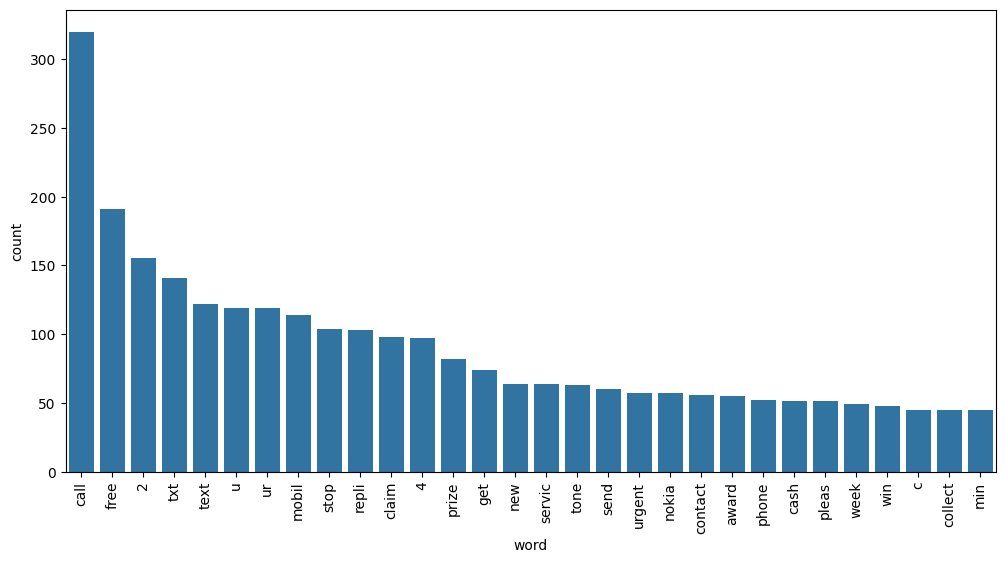

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=spam_count)
plt.xticks(rotation=90)
plt.show()

In [82]:
ham_corpus = []
for text in df[df['label'] == 0]['transformed_text']:
    for word in text.split():
        ham_corpus.append(word)

ham_corpus[:10]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la']

In [84]:
ham_count = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_count.columns = ['word', 'count']
ham_count.head()

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


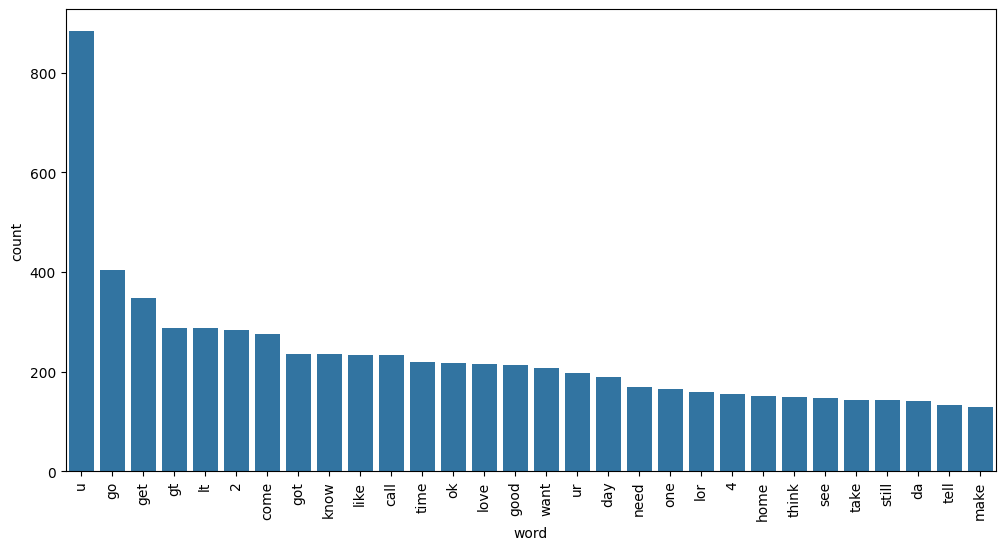

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=ham_count)
plt.xticks(rotation=90)
plt.show()

## 4. Model Building

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [88]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [89]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [100]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, precision_score, accuracy_score, confusion_matrix

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

0.8800773694390716
0.5315315315315315


In [96]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034

0.9642166344294004
0.8344370860927153


In [97]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

0.9700193423597679
0.9734513274336283


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [102]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [104]:
mnb.fit(X_train, y_train)
y_pred4 = mnb.predict(X_test)
print(classification_report(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))
print(precision_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [ ]:
#tfidf with multinomial naive bayes